# <div align='center'>第2章 参数估计</div>
### 内容<br>
 <div align='left'>                  
     <font color='steelblue' size=4>
       2.1 点估计<br><br>
       2.2 区间估计<br><br>
       </font>
       </div>

- #### 基本概念：

（1）已知总体符合某种分布，通过样本数据来估计总体分布所包含的未知参数，即称为参数估计(parametric estimation)。比如已知某总体符合正态分布$N(\mu,\sigma^2)$，可以通过样本数据估计$\mu,\sigma^2$的值。

（2）参数估计包括点估计(point estimation)和区间估计(interval estimation)两种类型。

（3）两种估计方法各有优缺点：点估计能够明确计算参数的值，但是无法确定估计值的可信度；区间估计通过上限和下限构成的区间估计参数的值，同时指明区间覆盖估计值的可靠程度（即置信度），但是不能明确指定参数的值。

- #### 参数估计的优良性准则：

（1）无偏估计: $E(\hat\theta) = \theta$，即通过样本估计的参数值的期望等于总体的参数。根据该准则，样本方差$S^2$是总体方差$\sigma^2$的无偏估计。

（2）有效性：参数更集中于待估计值的真值附近,$var(\theta_1) < var(\theta_2)$,$\theta_1$比$\theta_2$更好。根据该准则，对于正态总体$N(\mu,\sigma^2$)，$(\overline{X},S^2)$是$(\mu,\sigma^2)$的最小方差无偏估计。

（3）一致性：当样本数量$n$趋近无穷时，估计值与参数真值几乎完全一致。

-------------------

## 2.1 点估计-极大似然法
- #### 点估计的概念
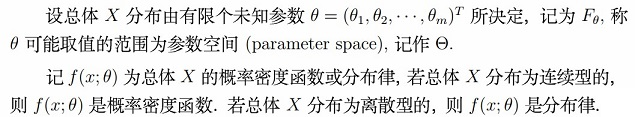

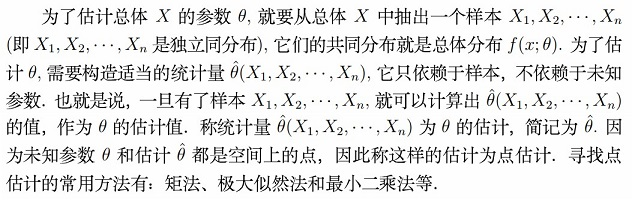

### 2.1.1 极大似然法的概念

- #### 似然函数定义
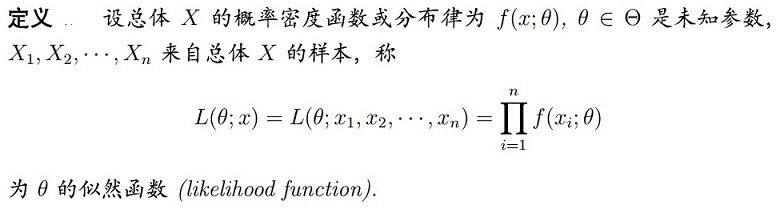

- #### 极大似然估计
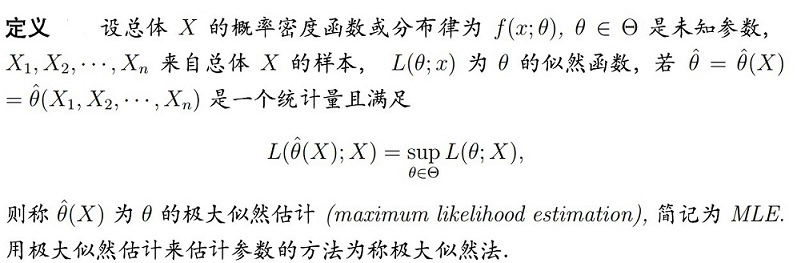

- #### 似然方程
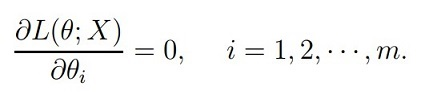

- #### 对数似然方程
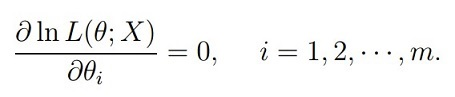

### 2.1.2 连续函数空间的解析解
- #### 正态分布的似然/对数似然函数和似然/对数似然方程
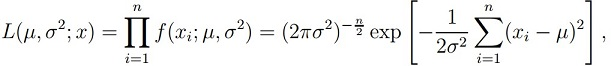
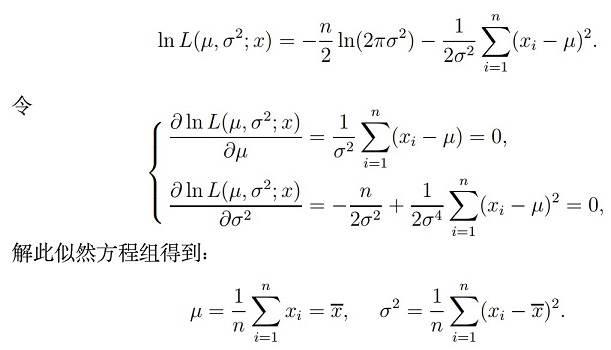


In [2]:
'''
通过极大似然法估计总体的参数，以正态分布为例。
（1）生成1000个均值为2,标准差为10的正太分布随机变量。
（2）通过上述公式估计均值和标准差，比较二者之间的异同。
（3）很显然存在误差，而且在随机变量的样本量不断增加时，估计值不断逼近总体的参数值。。
'''
import numpy as np
import scipy.stats as st
from  collections import namedtuple 
#均值为2，标准差为10的正态分布随机变量1000个
x = st.norm.rvs(loc=2,scale=10,size=1000)
print('前10个值：',x[0:10])

#通过上述对数似然方程的估计公式，计算均值和标准差
mu = np.sum(x)/len(x)
sigma = np.sqrt(np.sum((x-np.mean(x))**2)/len(x))
print('\n使用极大似然法估计得到的均值mu：%0.2f，标准差sigma为：%0.2f。'%(mu,sigma))

前10个值： [-13.51025449  -6.35484206 -11.50890497  -1.46951723   1.24917741
 -16.49505846  -1.43275211   5.9197182    7.8652449   16.11940615]

使用极大似然法估计得到的均值mu：2.01，标准差sigma为：9.99。


### 2.1.3 对数似然方程的数值解
 
以柯西(Couchy)分布为例,该总体分布的概率密度函数的尺度参数为$\gamma$，位置参数$\theta$。当尺度参数为1，位置参数为0时，称之为柯西分布的标准化形式或标准柯西分布。

注：描述总体分布离散程度的参数为尺度参数(scale parameter) ；描述总体分布集中趋势的参数为位置参数(location parameter) 。
- #### 概率密度函数：
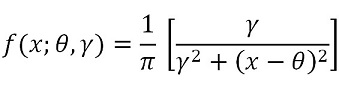
- #### 尺度参数为1时概率密度函数：
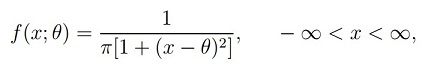

- #### 似然函数
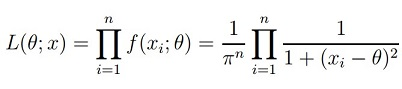

- #### 对数似然函数
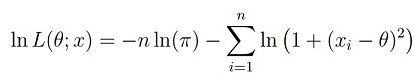

- #### 对数似然方程
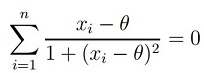

In [2]:
'''
使用Scipy的fsolve和root函数求似然方程的数值解。
fsolve和root函数都需要使用样本数据的中位数作为求解的起始点。
'''
from scipy.optimize import fsolve,root
#生成模拟数据
data = st.cauchy.rvs(loc=15,scale=1,size = 100)
#对数似然方程
def func(theta,x):
    return np.sum((x-theta)/(1+(x-theta)**2))
result = fsolve(func,np.median(data),args=data)
print('fsolve函数求解：',result)
result1 = root(func,np.median(data),args=data)
print('root函数求解',result1.x)
print('模拟数据的中位数：',np.median(data))

fsolve函数求解： [15.08947525]
root函数求解 [15.08947525]
模拟数据的中位数： 15.109579528973223


- #### 牛顿法

（1）对方程$f(x)=0$的解,开始迭代求解之前猜测一个逼近解的初始$x_0$值。通过函数$y=f(x)$的图形有助于估计该值。

（2）使用下述公式不断迭代，最终逼近数值解：
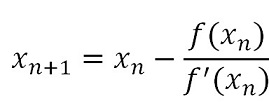
其中，$f^{'}(x_n)$是$f(x_n)$的一阶导数。

（3）一般设置一个停止迭代的阈值，比如当$x_{n+1}-x_n$的绝对值小于某个很小的常数时（比如1e-18），即停止迭代，返回最后一次迭代的值即为最终解。

In [3]:
'''
使用牛顿法估计柯西分布的未知参数。
以前面例子的模拟数据。
'''

def cauchy_mle(x,theta):
    sum = 0
    for i in range(0,len(x)):
        sum = sum+(x[i]-theta)/(1+(x[i]-theta)**2)
    return sum

#对数似然函数的一阶导数
def cauchy_mle_der(x,theta):
    sum = 0  
    for i in range(0,len(x)):
        tmp = (x[i]-theta)**2
        sum = sum+(tmp-1)/(1+tmp)**2
    return sum

#用样本中位数作为初始估计值
theta=np.median(data)

#迭代次数控制，当前一次迭代值与当前迭代值小于0.001时停止迭代。
#说明已经收敛。
std_diff=1e-18

while True:##无限循环
    ###牛顿法的迭代公式
    theta1 = theta - cauchy_mle(data,theta)/cauchy_mle_der(data,theta)
    ###当本次迭代的数值解和上次迭代数值解之差的绝对值小于阈值时，停止迭代，
    if np.abs(theta1-theta)<=std_diff:
        break
    else:
        theta=theta1
    print(theta)


15.089517106190895
15.089475247390668
15.089475247196702


-------------------

## 2.2 区间估计
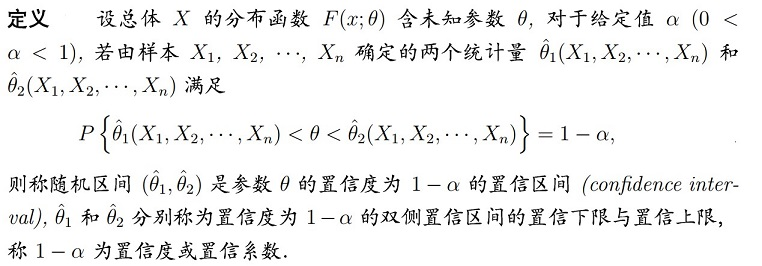

### 2.2.1 单个正态总体的均值$\mu$的区间估计
假设正态总体$X$~$N(\mu,\sigma^2),X_1,X_2,...,X_n$为来自正态总体$X$的一个样本，$1-\alpha$为置信度，$\overline{X}$为样本均值，$S^2$为样本方差。
- #### （1）当总体的方差$\sigma^2$已知：
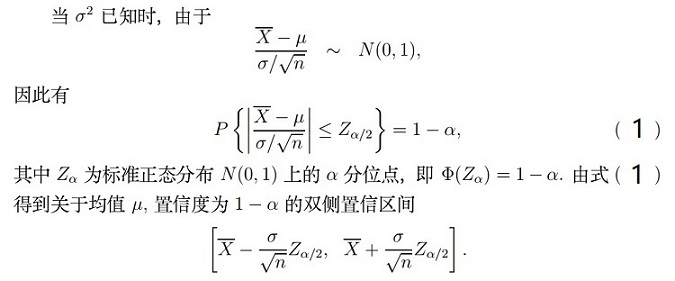


- #### （2）当总体的方差$\sigma^2$未知：

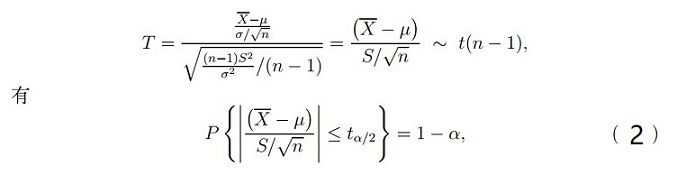

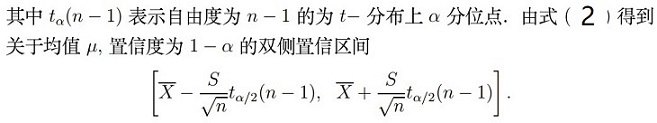

In [4]:
'''
单个正态总体的均值区间估计，分两种情况：方差已知和方差未知
可以大致了解数据的均值位于哪个区间，是否符合用户要求
'''

#命名元组，用来保存函数返回结果
MuResultSet = namedtuple('MuResultSet',['Mean','DF','Lower','Upper'])
def interval_mu(x, sigma=-1,alpha=0.05):
    n = len(x)#样本量
    m = np.mean(x)#样本均值
    
    #根据方差已知与否计算上下限的加减量
    if sigma >= 0:#总体方差已知
        tmp = (sigma/np.sqrt(n))*st.norm.ppf(1-alpha/2)
        df = n
    else:#总体方差未知
        tmp = (st.tstd(x)/np.sqrt(n))*st.t.ppf(1-alpha/2,n-1)
        df = n-1
    lower = m - tmp#置信下限
    upper = m + tmp#置信上限
    
    result = MuResultSet(Mean=np.round(m,2),DF=df,
                         Lower=np.round(lower,6),
                         Upper=np.round(upper,6))
    return result

In [5]:
'''
示例：某机器零件的长度服从N(mu,0.04)分布，随机抽取样本长度如下(单位：mm)：
    14.6,15.1,14.9,14.8,15.2,15.1
    求零件长度的置信区间0.95的区间估计。
'''
lengths = np.array([14.6,15.1,14.9,14.8,15.2,15.1])
interval_mu(lengths,0.2)

MuResultSet(Mean=14.95, DF=6, Lower=14.78997, Upper=15.11003)

In [6]:
'''
示例：抽样某零件样品的重量共10次，(单位：kg)，分别为：
    10.1,10,9.8,10.5,9.7,10.1,9.9,10.2,10.3,9.9
    求零件长度的置信区间0.95的区间估计。
'''
weights = np.array([10.1,10,9.8,10.5,9.7,10.1,9.9,10.2,10.3,9.9])
interval_mu(weights)

MuResultSet(Mean=10.05, DF=9, Lower=9.877225, Upper=10.222775)

In [7]:
'''
使用Scipy中的函数计算置信区间
分别为相应分布的interval函数，
注意interval函数的scale参数需要使用数据的标准误，而不是标准差
'''
#零件长度的置信区间，方差已知，使用正态分布的interval函数
#此处方差已知，所以直接使用0.2,即方差0.04的平方根
interv1 = st.norm.interval(0.95,loc = np.mean(lengths),scale = 0.2/np.sqrt(6))
print('通过Scipy的interval函数计算置信区间（方差已知）：',np.round(interv1,6))

#零件重量的置信区间，方差未知，使用t分布的interval函数
#此处第4个参数同样使用标准误，可以调用scipy的tsem函数计算样本数据的标准误
interv2 = st.t.interval(0.95,df = len(weights)-1,loc=np.mean(weights),scale=st.tsem(weights))
print('通过Scipy的interval函数计算置信区间（方差未知）：',np.round(interv2,6))

通过Scipy的interval函数计算置信区间（方差已知）： [14.78997 15.11003]
通过Scipy的interval函数计算置信区间（方差未知）： [ 9.877225 10.222775]


### 2.2.2 单个正态总体的方差$\sigma^2$的区间估计
- #### （1）当总体的均值$\mu$已知，极大似然估计、概率分布函数以及双侧置信区间分别为：
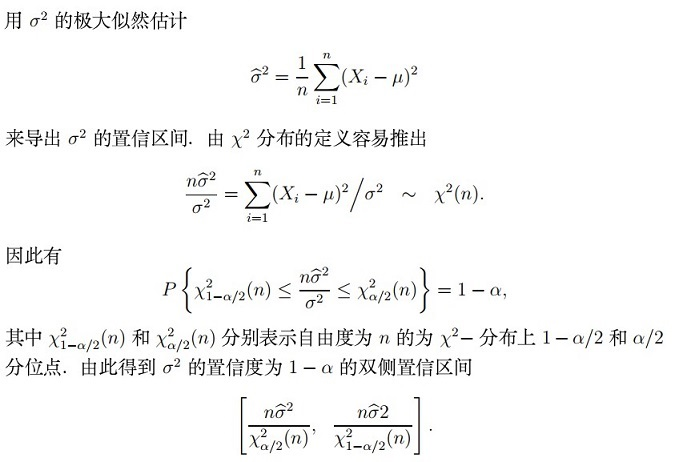
- #### （2）当总体的均值$\mu$未知，极大似然估计、概率分布函数以及双侧置信区间分别为：
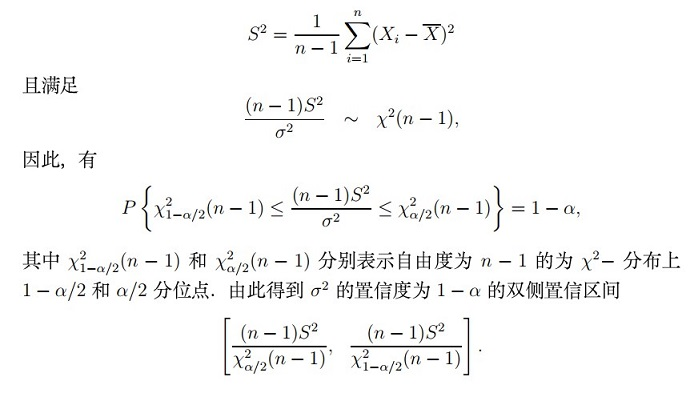

In [8]:
'''
单个正态总体的方差区间估计，分两种情况：均值已知和均值未知
可以用来测量数据的误差大小。
'''
from  collections import namedtuple 
#命名元组，用来保存函数返回结果
VarResultSet = namedtuple('VarResultSet',['Var','DF','Lower','Upper'])
def interval_var(x, mu=float('Inf'),alpha=0.05):
    n = len(x)#样本量
    
    if mu < float('Inf'):#均值已知
        S2 = np.sum((x-mu)**2)/n
        df = n
    else:#均值未知
        S2 = st.tvar(x)#使用方差的无偏估计，与np.var区分开。
        df = n-1
    
    lower = df*S2/st.chi2.ppf(1-alpha/2,df)
    upper = df*S2/st.chi2.ppf(alpha/2,df)
    
    result = VarResultSet(Var=S2,DF=df,Lower=np.round(lower,6),Upper=np.round(upper,6))
    return result

In [9]:
'''
示例：抽样某零件样品的重量共10次，(单位：kg)，分别为：
    10.1,10,9.8,10.5,9.7,10.1,9.9,10.2,10.3,9.9
    求零件长度的测量误差，分为已知均值为10和未知均值两种情况。
    结果显示，在均值已知的情况下，计算结果更好，即置信区间更窄。
'''
weights = np.array([10.1,10,9.8,10.5,9.7,10.1,9.9,10.2,10.3,9.9])
#已知均值为10
print('已知均值为10的方差置信区间:',interval_var(weights,10))
#均值未知
print('未知均值的方差置信区间:',interval_var(weights))

已知均值为10的方差置信区间: VarResultSet(Var=0.05499999999999999, DF=10, Lower=0.026851, Upper=0.169389)
未知均值的方差置信区间: VarResultSet(Var=0.05833333333333332, DF=9, Lower=0.027599, Upper=0.194416)


### 2.2.3 两个正态总体均值 $\mu_1$-$\mu_2$ 的区间估计

- #### （1）当两个总体的方差$\sigma^2_1$和$\sigma^2_2$已知时:
 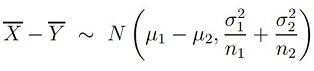
 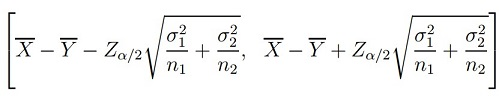
 
- #### （2）当两个总体的方差相同$\sigma^2_1$=$\sigma^2_2$=$\sigma^2$，且未知:
 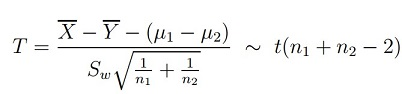
 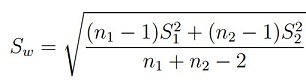
 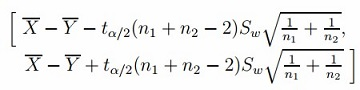
 
- #### （3）当两个总体的方差$\sigma^2_1$和$\sigma^2_2$未知，且$\sigma^2_1$ $\neq$ $\sigma^2_2$时:
 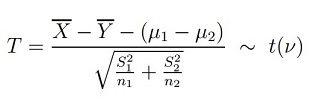
 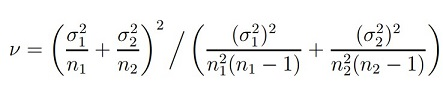
 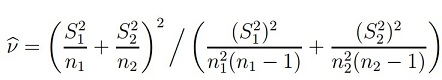
 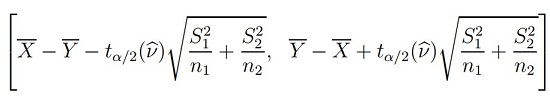
 

In [10]:
'''
在实际工作中，经常需要比较两个数据之间的平均值是否存在差异，
比如在教学科研中，需比较新老两种教学方法的效果是否存在差异，
那么就可以对两种方法的学生成绩的均值进行比较，如果存在显著差异即是效果，
反之则无差别。
'''
def interval_mu2(x,y,sigma=np.array([-1,-1]),vareq=False,alpha=0.05):
    n1 = len(x)
    n2 = len(y)
    mx = np.mean(x)
    my = np.mean(y)
    
    if np.all(sigma>0):#两个独立样本的方差已知
        #根据上述公式计算置信区间上、下限的加、减量
        tmp = st.norm.ppf(1-alpha/2)*np.sqrt(sigma[0]**2/n1+sigma[1]**2/n2)
        df = n1+n2
    else:
        if vareq:#两个独立样本的方差相等且未知
            sw = ((n1-1)*st.tvar(x)+(n2-1)*st.tvar(y))/(n1+n2-2)
            tmp = np.sqrt(sw*(1/n1+1/n2))*st.t.ppf(1-alpha/2,n1+n2-2)
            df = n1+n2-2
        else:#两个独立样本的方差不相等且未知
            s1 = st.tvar(x)
            s2 = st.tvar(y)
            nu = ((s1/n1+s2/n2)**2)/(s1**2/(n1**2*(n1-1))+s2**2/(n2**2*(n2-1)))
            tmp = st.t.ppf(1-alpha/2,nu)*np.sqrt(s1/n1+s2/n2)
            df = nu
    result = MuResultSet(Mean=mx-my,DF=df,
                         Lower=np.round(mx-my-tmp,6),
                         Upper=np.round(mx-my+tmp,6))
    return result

- #### 示例：
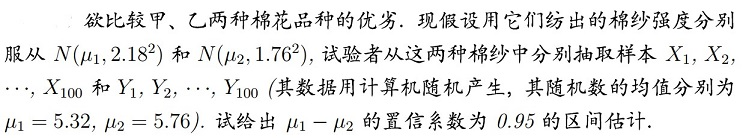

In [11]:
'''
示例：比较棉花品种优劣，方差已知。
教材上讲到：本例中计算结果的置信区间下限小于零、上限大于零，
说明置信区间包含了零，即不能排除mu1-mu2=0,说明不能排除两种棉花强度相等的可能。
但是事实上，根据实际运行结果并不完全如此，多次运行下述程序，偶尔有几次上、下限都小于零。
说明mu1-mu2<0，即第一种棉花的强度小于第二种棉花的强度。但是没有出现上、下限同时大于零的情况.
说明第一种棉花的强度是小于或等于第二种棉花的强度。
因此，还需根据具体的数据来进行判断。此处存疑！
即使使用原教材的R语言例子也是如此。
'''
#根据均值和标准差生成两个独立样本数据
x = st.norm.rvs(loc=5.32,scale=2.18,size=100)
y = st.norm.rvs(loc=5.76,scale=1.76,size=100)

#调用区间估计函数，方差已知
result = interval_mu2(x,y,np.array([2.18,3.76])) 
print('mu1-mu2置信水平0.95的区间估计为：',result)

#调用t检验函数，原假设是两个独立样本具有相同均值
result1 = st.ttest_ind(x,y,equal_var=False)
print('调用Scipy的t检验函数：',result1)

mu1-mu2置信水平0.95的区间估计为： MuResultSet(Mean=-0.4323148226449529, DF=200, Lower=-1.284167, Upper=0.419537)
调用Scipy的t检验函数： Ttest_indResult(statistic=-1.4027341960159867, pvalue=0.16252062288605426)


- #### 示例：
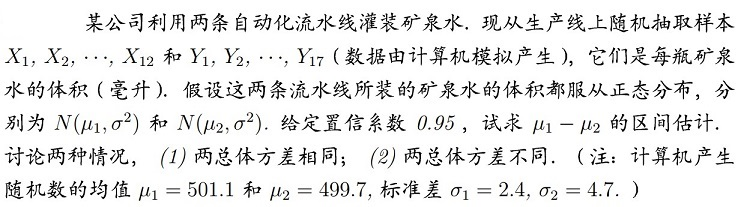

In [12]:
'''
示例：比较矿泉水体积，方差未知，相同和不相同两种情况。
下述程序运行结果表明，无论何种检验方式，都不能拒绝两条流水线上生辰的矿泉水体积相等。
区间估计表明上限大于零，下限小于零，即区间包含了零。
t检验的p值大于0.05，不能拒绝两个独立样本的均值相等的原假设。
在假设方差不同的情况下，计算结果更加精确，即置信区间更窄。
'''
x = st.norm.rvs(501.1,2.4,12)
y = st.norm.rvs(499.7,4.7,17)
#方差未知，且相同
result1 = interval_mu2(x,y,vareq=True)
print('方差未知且相同：',result1)
#方差未知，且不同
result2 = interval_mu2(x,y)
print('方差未知且不同:',result2)

#下面调用Scipy的t检验函数，分为方差相同和不同
result3 = st.ttest_ind(x,y,equal_var=True)
print('t检验，方差相同：',result3)
result4 = st.ttest_ind(x,y,equal_var=False)
print('t检验，方差不同：',result4)

方差未知且相同： MuResultSet(Mean=1.5422971440557376, DF=27, Lower=-2.087884, Upper=5.172478)
方差未知且不同: MuResultSet(Mean=1.5422971440557376, DF=22.954957355651743, Lower=-1.688194, Upper=4.772788)
t检验，方差相同： Ttest_indResult(statistic=0.8717285134879528, pvalue=0.39104239170399724)
t检验，方差不同： Ttest_indResult(statistic=0.9877231742337961, pvalue=0.33358586931440937)


### 2.2.4 两个正态总体的方差比$\sigma^2_1$/$\sigma^2_2$的区间估计
- #### （1）$\mu_1$与$\mu_2$已知：
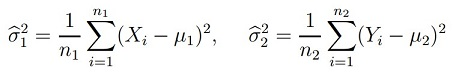
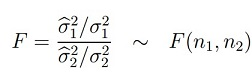
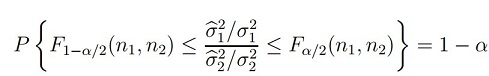
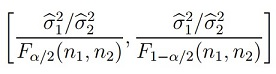
- #### （2）$\mu_1$与$\mu_2$未知：
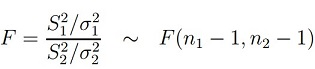
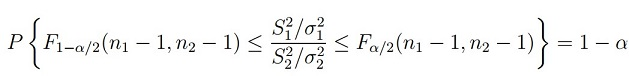
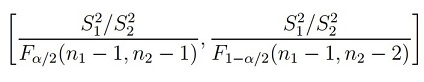

In [13]:
'''
方差用来描述数据的分散程度，方差比则可以比较两个样本数据之间的分散与波动程度。
'''
VRateResultSet = namedtuple('VRateResultSet',['Rate','DF1','DF2','Lower','Upper'])
def interval_var2(x,y,mu=np.array([float('Inf'),float('Inf')]),alpha=0.05):
    n1 = len(x)#样本量
    n2 = len(y)
    
    if np.all(mu < float('Inf')):#均值已知
        #根据已知均值计算方差
        Sx2 = 1/n1*np.sum((x-mu[0])**2)
        Sy2 = 1/n2*np.sum((y-mu[1])**2)
        df1 = n1
        df2 = n2        
    else:#均值未知
        #直接计算样本方差作为总体方差的无偏估计，此时自由度等于：样本量-1
        Sx2 = st.tvar(x)
        Sy2 = st.tvar(y)
        df1 = n1-1
        df2 = n2-1
    rate = Sx2/Sy2
    lower = rate/st.f.ppf(1-alpha/2,df1,df2)
    upper = rate/st.f.ppf(alpha/2,df1,df2)
    result = VRateResultSet(Rate=rate,DF1=df1,DF2=df2,
                            Lower=np.round(lower,6),
                            Upper=np.round(upper,6))
    return result

#### 示例：
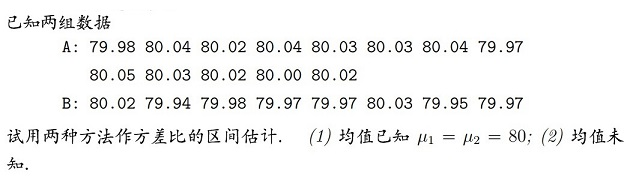

In [14]:
'''
示例：比较两组数据的方差，也就数据的波动情况
分为均值已知和未知两种情况
本例中的方差比的置信区间包含了1，不能拒绝两个样本数据的来源总体方差相同的原假设
但是实际上样本的方差肯定存在差别，不拒绝两个总体的方差相同是统计学的解释。
'''
x = np.array([79.98,80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 79.97,
              80.05, 80.03, 80.02, 80.00, 80.02])
y = np.array([80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97])
#均值已知
result1 = interval_var2(x,y,np.array([80,80]))
print('均值已知的方差比：',result1)
#均值未知
result2 = interval_var2(x,y)
print('均值未知的方差比：',result2)

均值已知的方差比： VRateResultSet(Rate=0.7326007326007866, DF1=13, DF2=8, Lower=0.176014, Upper=2.482042)
均值未知的方差比： VRateResultSet(Rate=0.5837405184048123, DF1=12, DF2=7, Lower=0.12511, Upper=2.105269)


In [15]:
'''
使用f分布的interval函数计算方差比的置信区间，分为已知均值和未知均值两种
注意自由度的设置，在总体均值已知的情况下，自由度分别等于样本量；未知则等于样本量减1
很显然在均值未知的情况下，计算结果更精确。
'''
#注意：自由度设置顺序，第一个自由度为分母的自由度，第二个为分子的自由度。scale为x和y的方差之比
result1 = st.f.interval(0.95,len(y),len(x),
                        scale=(np.sum((x-80)**2)/len(x))/(np.sum((y-80)**2)/len(y)))
print('使用Scipy计算方差比置信区间(均值已知)：',np.round(result1,6))

#使用样本方差作为总体方差的无偏估计，则自由度分别减1。
result2 = st.f.interval(0.95,len(y)-1,len(x)-1,scale=st.tvar(x)/st.tvar(y))
print('使用Scipy计算方差比置信区间(均值未知)：',np.round(result2,6))

使用Scipy计算方差比置信区间(均值已知)： [0.176014 2.482042]
使用Scipy计算方差比置信区间(均值未知)： [0.12511  2.105269]


### 2.2.5 非正态分布总体均值的区间估计
- #### （1）中心极限定理：
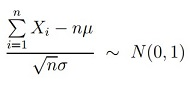
- #### （2）方差已知：
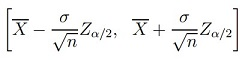
- #### （3）方差未知：
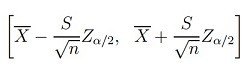

In [16]:
'''
利用中心极限定理，将无法肯定符合正态分布的数据转换成正态分布的区间估计问题。
'''
NNResultSet = namedtuple('NNResultSet',['Mean','Lower','Upper'])
def interval_mu3(x,sigma=-1,alpha=0.05):
    n = len(x)
    mx = np.mean(x)
    if sigma>0:
        tmp = sigma/np.sqrt(n)*st.norm.ppf(1-alpha/2)
    else:
        tmp = st.tstd(x)/np.sqrt(n)*st.norm.ppf(1-alpha/2)
    return NNResultSet(Mean = mx,Lower=np.round(mx-tmp,6),Upper=np.round(mx+tmp,6))

- #### 示例：
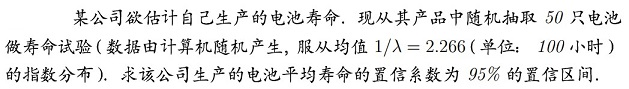

In [17]:
'''
示例：将符合指数分布的电池寿命数据转换成正态分布的均值区间估计
注意在生成指数分布的随机变量时，一般使用scale=1/lambda
Scipy的官方参考文档原文如此：
This parameterization corresponds to using scale = 1/lambda
本例中 1/lambda=2.266
注意当生成的随机数的数量越多时，置信区间的估计越精确
'''
#生成样本数据。样本量越大，区间估计越精确
x = st.expon.rvs(scale=2.266,size=1000)
#方差未知
result1 = interval_mu3(x)
print('方差未知的非正态总体均值区间估计：',result1)
#调用Scipy的interval函数估计区间，方差未知。
result2 = st.norm.interval(0.95,loc = np.mean(x),scale=st.tstd(x)/(len(x)**0.5))
print('调用interval函数估计非正态总体均值置信区间：',np.round(result2,6))

方差未知的非正态总体均值区间估计： NNResultSet(Mean=2.226217079001451, Lower=2.090919, Upper=2.361515)
调用interval函数估计非正态总体均值置信区间： [2.090919 2.361515]


### 2.2.6 单侧置信区间估计
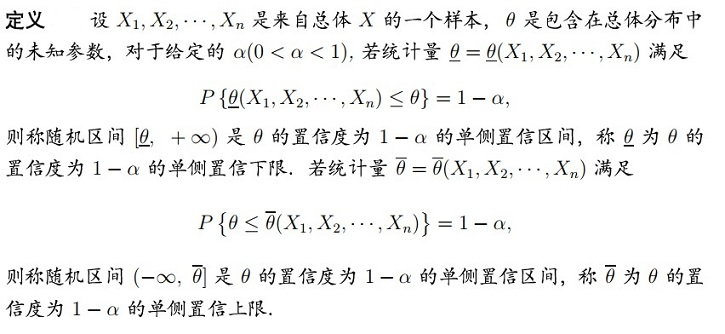
一般情况下，选择置信下限时，下限值越大越好；反之，如果选择置信上限时，上限值越小越好。

#### (1)单总体均值单侧置信区间
- ###### $\sigma^2$已知的情况下：<br>
分布函数
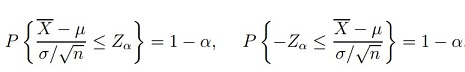
单侧置信区间
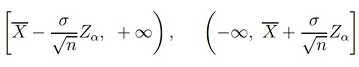
单侧置信下限、上限
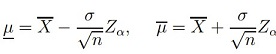

- ###### $\sigma^2$未知的情况下：<br>
分布函数
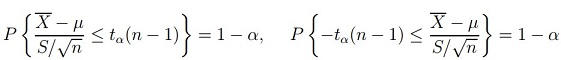
单侧置信区间
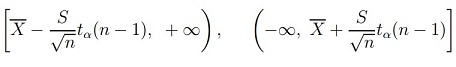
单侧置信下限、上限
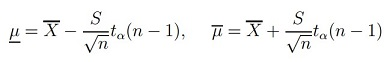


In [33]:
'''
一个总体的均值单侧置信区间估计的用途也比较广泛，比如设备、元件等只关心最低寿命，即平均寿命的下限
对产品的生产一般只关心最大废品率，也就是废品率的上限。
'''
UniMuResultSet = namedtuple('UniMuResultSet',['Mean','DF','Lower','Upper'])
def interval_mu4(x, sigma=-1,side='two-sided',alpha=0.05):
    n=len(x)
    mx=np.mean(x)
    if sigma>0:#已知总体方差
        if side=='upper':#单侧置信上限
            tmp=sigma/np.sqrt(n)*st.norm.ppf(1-alpha)
            lower=float('-Inf')
            upper=mx+tmp
        elif side=='lower':#单侧置信下限
            tmp=sigma/np.sqrt(n)*st.norm.ppf(1-alpha)
            lower=mx-tmp
            upper=float('Inf')
        elif side=='two-sided':#双侧置信区间
            #当进行双侧置信区间估计时，分位数的概率为1-alpha/2或alpha/2
            tmp=sigma/np.sqrt(n)*st.norm.ppf(1-alpha/2)
            lower=mx-tmp
            upper=mx+tmp
        df=n
    else:#总体方差未知
        if side=='upper':#置信上限
            tmp=st.tstd(x)/np.sqrt(n)*st.t.ppf(1-alpha,n-1)
            lower=float('-Inf')
            upper=mx+tmp
        elif side=='lower':#单侧置信下限
            tmp=st.tstd(x)/np.sqrt(n)*st.t.ppf(1-alpha,n-1)
            lower=mx-tmp
            upper=float('Inf')
        elif side=='two-sided':#双侧置信区间
            #当进行双侧置信区间估计时，分位数的概率为1-alpha/2或alpha/2
            tmp=st.tstd(x)/np.sqrt(n)*st.t.ppf(1-alpha/2,n-1)
            lower=mx-tmp
            upper=mx+tmp
        df=n-1
    return UniMuResultSet(Mean=mx,DF=df,Lower=np.round(lower,6),Upper=np.round(upper,6))

In [34]:
'''
示例：从一批零件中随机抽取10只做寿命测试，测得寿命（单位：小时）如下：
    1067,919,1196,785,1126,936,918,1156,920,948
零件寿命服从正态分布，求寿命平均值的置信度为0.95的单侧置信下限。
'''
#未知总体方差的情况下的单侧置信下限。
x = np.array([1067,919,1196,785,1126,936,918,1156,920,948])
#计算零件寿命的单侧置信下限，即95%的零件寿命大于多少
result1 = interval_mu4(x,side='lower')
print('单侧置信下限：',result1)

#Scipy在求单侧置信区间的上限或下限时，其实就是求标准误在概率分布为5%时的百分位数
result2 = st.t.ppf(0.05,df = len(x)-1,loc=np.mean(x),scale=st.tstd(x)/len(x)**0.5)
print('Scipy求单侧置信下限：',np.round(result2,6))

单侧置信下限： UniMuResultSet(Mean=997.1, DF=9, Lower=920.844338, Upper=inf)
Scipy求单侧置信下限： 920.844338


In [35]:
#计算零件寿命的单侧置信上限，即95%的零件寿命小于多少
result3 = interval_mu4(x,side='upper')
print('单侧置信下限：',result3)

#Scipy在求单侧置信区间的上限或下限时，就是求标准误在概率分布为95%时的百分位数
result4 = st.t.ppf(0.95,df = len(x)-1,loc=np.mean(x),scale=st.tstd(x)/len(x)**0.5)
print('Scipy求单侧置信上限：',np.round(result4,6))

单侧置信下限： UniMuResultSet(Mean=997.1, DF=9, Lower=-inf, Upper=1073.355662)
Scipy求单侧置信上限： 1073.355662


In [36]:
'''
补充一点：scipy.stats下各概率分布函数功能十分强大，值得仔细探索。比如：
各分布的ppf，即百分位点函数本身可以计算置信区间，尤其是loc和scale两个参数需仔细揣摩。
除了阅读官方文档外，阅读代码也可以获得意外收获。
'''
#上文中result4的计算公式可以分解如下：t分布百分数*标准误+均值，
#其实就是前述公式图片和自定义函数中的计算公式
result4_1 = st.t.ppf(0.95,df=len(x)-1)*st.tstd(x)/len(x)**0.5+np.mean(x)
print('ppf计算单侧置信区间的分解(单侧置信上限)：',np.round(result4_1,6))

ppf计算单侧置信区间的分解(单侧置信上限)： 1073.355662


In [37]:
'''
双侧置信区间的计算以及分解，利用Scipy的interval函数和ppf函数
注意：计算双侧置信区间的上下限与计算单侧置信区间的上下限的概率值是不一样的。
双侧0.975和0.025,单侧分别为0.95和0.05
回归分析模型对回归系数进行t检验的置信区间表示方式：[0.025,0.975]
'''
#利用interval函数计算双侧置信区间，结果与interval_mu4一致（设side='two-sided'）
result5_1 = st.t.interval(0.95,df=len(x)-1,loc=np.mean(x),scale=st.tstd(x)/len(x)**0.5)
print('interval函数计算双侧置信区间：',np.round(result5_1,6))
#ppf函数分别计算双侧置信区间的上限和下限。注意：和计算单侧置信区间的上下限是有区别的。
result5_2 = st.t.ppf(0.975,df=len(x)-1,loc=np.mean(x),scale=st.tstd(x)/len(x)**0.5)
print('ppf函数计算双侧置信区间的上限：',np.round(result5_2,6))
result5_3 = st.t.ppf(0.025,df=len(x)-1,loc=np.mean(x),scale=st.tstd(x)/len(x)**0.5)
print('ppf函数计算双侧置信区间的下限：',np.round(result5_3,6))
result5_4 = interval_mu4(x,side='two-sided')
print('interval_mu4函数计算双侧置信区间：',result5_4)

interval函数计算双侧置信区间： [ 902.996528 1091.203472]
ppf函数计算双侧置信区间的上限： 1091.203472
ppf函数计算双侧置信区间的下限： 902.996528
interval_mu4函数计算双侧置信区间： UniMuResultSet(Mean=997.1, DF=9, Lower=902.996528, Upper=1091.203472)


#### (2)单总体方差$\sigma^2$的单侧置信区间
- ###### $\mu$已知情况下：<br>
<br>分布函数
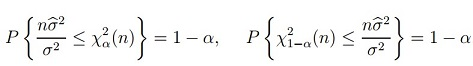
单侧置信区间
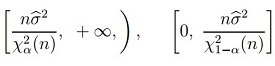
单侧置信下限、上限
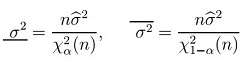

- ###### $\mu$未知情况下：<br>
<br>分布函数
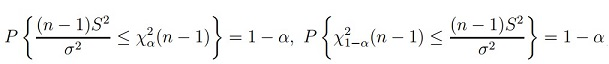
单侧置信区间
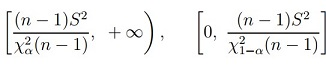
单侧置信下限、上限
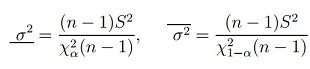


In [3]:
'''
单个总体的方差单侧置信区间用途也很广泛，比如关注某零件寿命或尺寸的最大误差可能有多大，
对于保证整个系统的稳定性很有意义。
'''
UniVarResultSet = namedtuple('UniVarResultSet',['Var','DF','Lower','Upper'])
def interval_var3(x,mu=float('Inf'),side='two-sided',alpha=0.05):
    n=len(x)
    if mu<float('Inf'):
        S2=np.sum((x-mu)**2)/n
        df=n
    else:
        S2=st.tvar(x)
        df=n-1
    if side=='upper':#置信上限
        lower=0
        upper=df*S2/st.chi2.ppf(alpha,df)
    elif side=='lower':#置信下限
        lower=df*S2/st.chi2.ppf(1-alpha,df)
        upper=float('Inf')
    elif side=='two-sided':#双侧置信区间
        lower=df*S2/st.chi2.ppf(1-alpha/2,df)
        upper=df*S2/st.chi2.ppf(alpha/2,df)
    
    return UniVarResultSet(Var=np.round(S2,7),DF=df,
                           Lower=np.round(lower,7),
                           Upper=np.round(upper,7))

In [4]:
'''
计算前述零件重量的例子，比较关心重量的最大误差是多少
也就是求样本数据的单侧上限
示例：抽样某零件样品的重量共10次，(单位：kg)，分别为：
    10.1,10,9.8,10.5,9.7,10.1,9.9,10.2,10.3,9.9
    求零件重量方差的单侧置信区间上限，即其最大误差是多少。
'''
x=np.array([10.1,10,9.8,10.5,9.7,10.1,9.9,10.2,10.3,9.9])
print('自定义函数interval_var3求解置信上限：',interval_var3(x,side='upper'))
print('自定义函数interval_var3求解置信下限：',interval_var3(x,side='lower'))

自定义函数interval_var3求解置信上限： UniVarResultSet(Var=0.0583333, DF=9, Lower=0, Upper=0.1578894)
自定义函数interval_var3求解置信下限： UniVarResultSet(Var=0.0583333, DF=9, Lower=0.0310302, Upper=inf)


- #### 通过ppf函数求解单侧置信区间
通过chi2分布的ppf函数求单侧置信区间的上，下限，稍微有点麻烦，因为该分位数是作为分母存在的。
使用df*S2的倒数作为scale参数，chi2.ppf使用该scale乘以0.05的分位数，然后求该乘积的倒数即置信上限。
还有一点要注意：由于方差>=0,因此在求上限之后单侧置信区间应该是[0,上限]


In [5]:
###ppf函数的loc和scale两个参数的涵义和用法
st.chi2.ppf(0.05,9),st.chi2.ppf(0.05,9,scale=10),\
st.chi2.ppf(0.05,9,loc=3),st.chi2.ppf(0.05,9,loc=3,scale=10)

(3.325112843066815, 33.251128430668146, 6.325112843066815, 36.251128430668146)

In [6]:
###ppf(p, ..., loc, scale)=ppf(p, ...)*scale+loc
st.chi2.ppf(0.05,9)*10+3

36.251128430668146

- #### $\mu$未知的总体方差单侧置信下限、上限

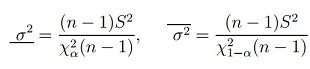

In [7]:
#ppf函数求置信上限
result1 = 1/st.chi2.ppf(0.05,df=len(x)-1,scale=1/((len(x)-1)*st.tvar(x)))
print('ppf函数求置信上限：',np.round(result1,6))
#ppf函数计算置信下限
result2 = 1/st.chi2.ppf(0.95,df=len(x)-1,scale=1/((len(x)-1)*st.tvar(x)))
print('ppf函数求置信下限：',np.round(result2,6))

ppf函数求置信上限： 0.157889
ppf函数求置信下限： 0.03103


#### (3) 两个总体求均值之差$\mu_1$-$\mu_2$单侧置信区间上、下限

- ###### $\sigma^2_1$, $\sigma^2_2$已知的情况下：

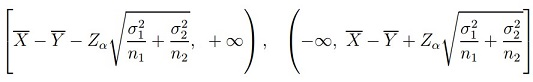


- ###### $\sigma^2_1$=$\sigma^2_2$=$\sigma^2$，且未知的情况下：

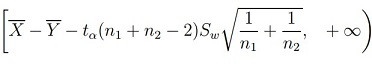
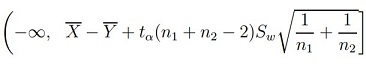
<br>
- ###### $\sigma^2_1$ $\neq$ $\sigma^2_2$，且未知的情况下：
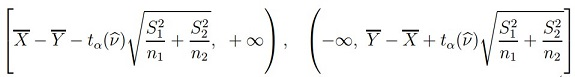

In [28]:
'''
两个总体求均值之差的单侧置信区间，如果已知总体的方差，则是使用总体方差。
如果未知，则使用样本方差的无偏估计代替。
'''
DsMuResultSet = namedtuple('DsMuResultSet',['Mean','DF','Lower','Upper'])
def interval_mu5(x,y, sigma=np.array([-1,-1]),vareq=False,side='two-sided',alpha=0.05):
    n1=len(x)
    n2=len(y)
    mx=np.mean(x)
    my=np.mean(y)
    diff=mx-my
    if np.all(sigma>=0):
        if side=='upper':#置信上限
            tmp=st.norm.ppf(1-alpha)*np.sqrt(sigma[0]**2/n1+sigma[1]**2/n2)
            lower=float('-Inf')
            upper=diff+tmp
        elif side=='lower':#置信下限
            tmp=st.norm.ppf(1-alpha)*np.sqrt(sigma[0]**2/n1+simga[1]**2/n2)
            lower=diff-tmp
            upper=float('Inf')
        elif side=='two-sided':#双侧置信区间
            tmp=st.norm.ppf(1-alpha/2)*np.sqrt(sigma[0]**2/n1+sigma[1]**2/n2)
            lower=diff-tmp
            upper=diff+tmp
        df=n1+n2
    else:
        if vareq:
            sw=((n1-1)*st.tvar(x)+(n2-1)*st.tvar(y))/(n1+n2-2)
            if side=='upper':
                tmp=np.sqrt(sw*(1/n1+1/n2))*st.t.ppf(1-alpha,n1+n2-2)
                lower=float('-Inf')
                upper=diff+tmp
            elif side=='lower':
                tmp=np.sqrt(sw*(1/n1+1/n2))*st.t.ppf(1-alpha,n1+n2-2)
                lower=diff-tmp
                upper=float('Inf')
            elif side=='two-sided':
                tmp=np.sqrt(sw*(1/n1+1/n2))*st.t.ppf(1-alpha/2,n1+n2-2)
                lower=diff-tmp
                upper=diff+tmp
            df=n1+n2-2
        else:
            s1=st.tvar(x)
            s2=st.tvar(y)
            nu=(s1/n1+s2/n2)**2/(s1**2/n1**2/(n1-1)+s2**2/n2**2/(n2-1))
            if side=='upper':
                tmp=st.t.ppf(1-alpha,nu)*np.sqrt(s1/n1+s2/n2)
                lower=float('-Inf')
                upper=diff+tmp
            elif side=='lower':
                tmp=st.t.ppf(1-alpha,nu)*np.sqrt(s1/n1+s2/n2)
                lower=diff-tmp
                upper=float('Inf')
            elif side=='two-sided':
                tmp=st.t.ppf(1-alpha/2,nu)*np.sqrt(s1/n1+s2/n2)
                lower=diff-tmp
                upper=diff+tmp
            df=nu
    return DsMuResultSet(Mean=np.round(diff,6),
                         DF=np.round(df,6),
                         Lower=np.round(lower,6),
                         Upper=np.round(upper,6))

In [29]:
'''
应用前述灌装水例子
'''
x = st.norm.rvs(501.1,2.4,12)
y = st.norm.rvs(499.7,4.7,17)
#单侧置信区间上限、下限以及双侧置信区间的计算结果
interval_mu5(x,y,side='upper'),interval_mu5(x,y,side='lower'),\
interval_mu5(x,y,side='two-sided')

(DsMuResultSet(Mean=2.775623, DF=17.806284, Lower=-inf, Upper=5.261699),
 DsMuResultSet(Mean=2.775623, DF=17.806284, Lower=0.289547, Upper=inf),
 DsMuResultSet(Mean=2.775623, DF=17.806284, Lower=-0.236981, Upper=5.788227))

#### (4)两个总体方差比$\sigma^2_1$ /$\sigma^2_2$ 的单侧置信区间估计

- ###### $\mu_1$、$\mu_2$已知情况下：

分布函数
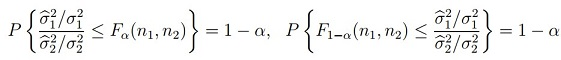

$\sigma^2_1$ /$\sigma^2_2$单侧置信区间
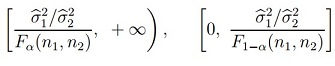

- ###### $\mu_1$、$\mu_2$未知情况下：：

分布函数
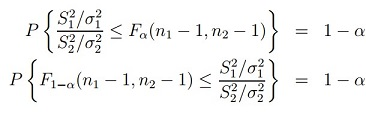

$\sigma^2_1$ /$\sigma^2_2$单侧置信区间
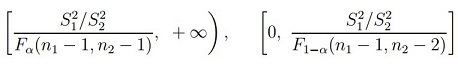

In [30]:
'''
比较两个样本数据测量的误差大小，特别是方差比的单侧置信下限、上限
'''
DsVRateResultSet = namedtuple('DsVRateResultSet',['Rate','DF1','DF2','Lower','Upper'])
def interval_var4(x,y,mu=np.array([float('Inf'),float('Inf')]),side='two-sided',alpha=0.05):
    n1=len(x)
    n2=len(y)
    if np.all(mu<float('Inf')):
        sx2=1/n1*np.sum(x-mu[0]**2)
        df1=n1
        sy2=1/n2*np.sum(y-mu[1]**2)
        df2=n2
    else:
        sx2=st.tvar(x)
        sy2=st.tvar(y)
        df1=n1-1
        df2=n2-1
    rate=sx2/sy2
    if side=='upper':
        lower=0
        upper=rate/st.f.ppf(alpha,df1,df2)
    elif side=='lower':
        lower=rate/st.f.ppf(1-alpha,df1,df2)
        upper=float('Inf')
    elif side=='two-sided':
        lower=rate/st.f.ppf(1-alpha/2,df1,df2)
        upper=rate/st.f.ppf(alpha/2,df1,df2)
    
    return DsVRateResultSet(Rate=np.round(rate,6),
                            DF1=df1,DF2=df2,
                            Lower=np.round(lower,6),
                            Upper=np.round(upper,6))    

In [31]:
'''
仍用上文中方差比双侧置信区间的例子。
可以从例子中看出，无论单侧置信区间还是双侧置信区间都包含了1，
所以两个数据样本测量误差的差别不显著。
'''
x = np.array([79.98,80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 79.97,
              80.05, 80.03, 80.02, 80.00, 80.02])
y = np.array([80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97])
#单侧置信区间的上限、下限，双侧置信区间
interval_var4(x,y,side='upper'),interval_var4(x,y,side='lower'), \
interval_var4(x,y,side='two-sided')

(DsVRateResultSet(Rate=0.583741, DF1=12, DF2=7, Lower=0, Upper=1.700645),
 DsVRateResultSet(Rate=0.583741, DF1=12, DF2=7, Lower=0.163299, Upper=inf),
 DsVRateResultSet(Rate=0.583741, DF1=12, DF2=7, Lower=0.12511, Upper=2.105269))

In [32]:
'''
ppf函数计算单侧置信区间：
注意上图中的公式，求f分布分位数的倒数。所以应先求scale=rate的倒数在dfn,dfd自由度下的分位数
然后在求此分位数的倒数，即单侧置信区间的上下限。dfn=len(x)-1,dfd=len(y)-1
由于rate=st.tvar(x)/st.tvar(y)，则1/rate等于st.tvar(y)/st.tvar(x)
'''
#置信上限
print('单侧置信上限：',1/st.f.ppf(0.05,len(x)-1,len(y)-1,scale=st.tvar(y)/st.tvar(x)))
#置信下限
print('单侧置信下限：',1/st.f.ppf(0.95,len(x)-1,len(y)-1,scale=st.tvar(y)/st.tvar(x)))

单侧置信上限： 1.7006452137148957
单侧置信下限： 0.16329884036224449


-----------